선형모델
==
다루는 내용
--
- 머신러닝 개념
- 경사하강법
- 선형회귀, 회귀직선
- 선형분류, 분류경계
- 컨퓨전 매트릭스, 분류성능,ROC, AUC

## 실습 데이터 생성

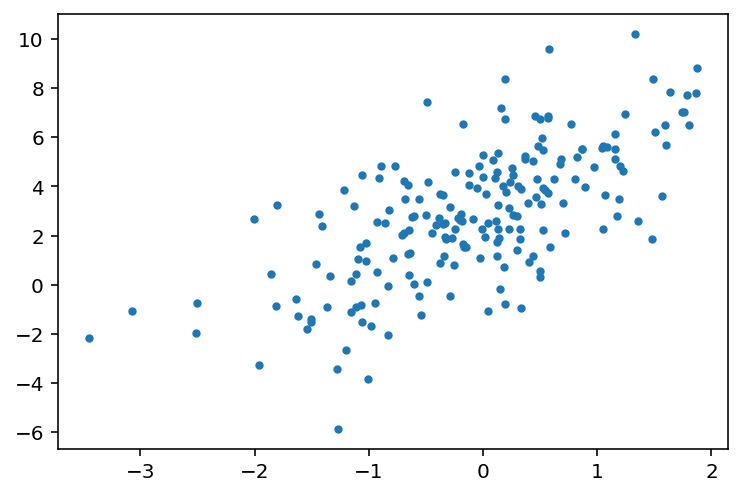

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

n_samples = 200
x = np.random.randn(n_samples)

# 계수 및 절편
w = 2
b = 3
# 노이지 
y = w*x + b + np.random.randn(n_samples)*2
plt.scatter(x,y, s=10)

## 선형회귀 모델 사용

In [3]:
from sklearn.linear_model import LinearRegression
leg = LinearRegression()
leg.fit(x.reshape(-1,1), y)

print(leg.coef_)
print(leg.intercept_)

[1.93290694]
3.0273608692188967


In [4]:
leg.coef_[0]

1.932906940964915

In [5]:
leg.intercept_

3.0273608692188967

## 회귀직선

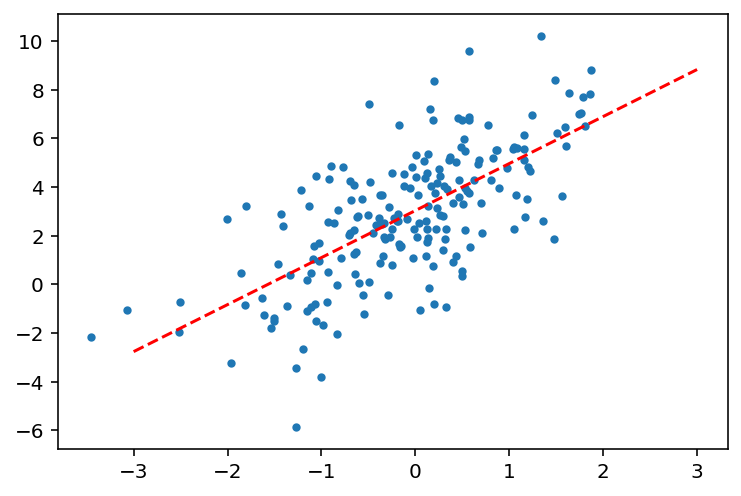

In [6]:
a, b = leg.coef_, leg.intercept_
xs = np.linspace(-3, 3, 2)
plt.plot(xs, a*xs + b, "r--")
plt.scatter(x,y, s=10)

## 남여 키-몸무게-성별 예측

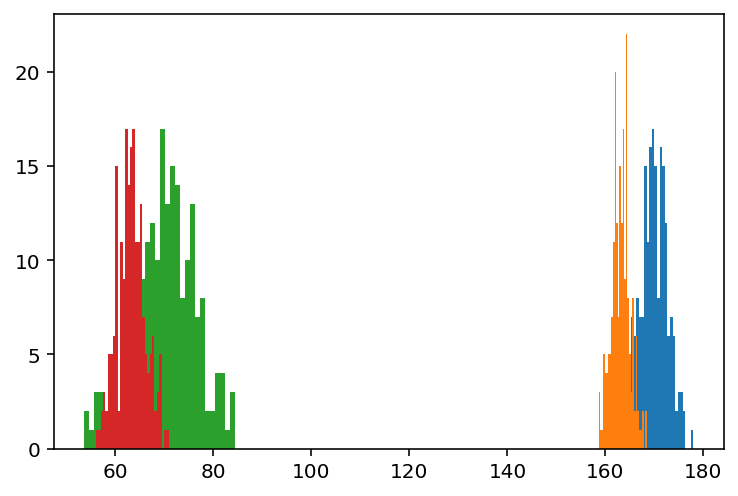

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split

n_samples = 200 #  사람수 남여, 각각
x1 = 3*np.random.randn(n_samples) + 170
x2 = 2*np.random.randn(n_samples) + 163

y1 = 2*x1 - 270 + 3*np.random.randn(n_samples) # 평균 70kg
y2 = 1*x2 - 100 + 2*np.random.randn(n_samples) # 평균 60kg
plt.hist(x1, bins=30)
plt.hist(x2, bins=30)

plt.hist(y1, bins=30)
plt.hist(y2, bins=30)
plt.show()

In [8]:
# 남자 데이터만 사용하여 키로부터 몸무게 예측
X_train, X_test, y_train, y_test = train_test_split(x2, y2)
leg1 = LinearRegression()
leg1.fit(X_train.reshape(-1,1), y_train)

# R-square 점수
leg1.score(X_test.reshape(-1,1), y_test)

0.3411498647263127

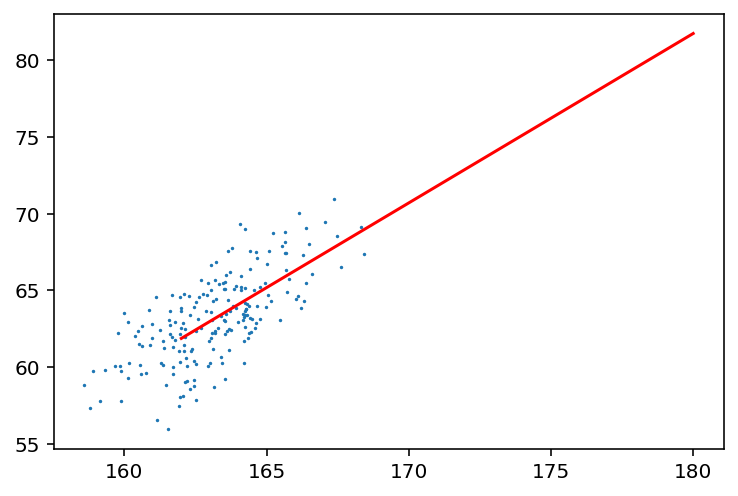

In [9]:
xs = np.linspace(162,180,2)
ys = xs * leg1.coef_[0] + leg1.intercept_
plt.scatter(x2, y2, s=0.5)
plt.plot(xs, ys, c='r')

## 남여 데이터를 합친 데이터 (400명)

In [10]:
x = np.concatenate((x1, x2)) # np.hstack((x1,x2))
y = np.concatenate((y1, y2))

X_train, X_test, y_train, y_test = train_test_split(x, y)
leg1 = LinearRegression()
leg1.fit(X_train.reshape(-1,1), y_train)
leg1.score(X_test.reshape(-1,1), y_test)

0.7538593815365555

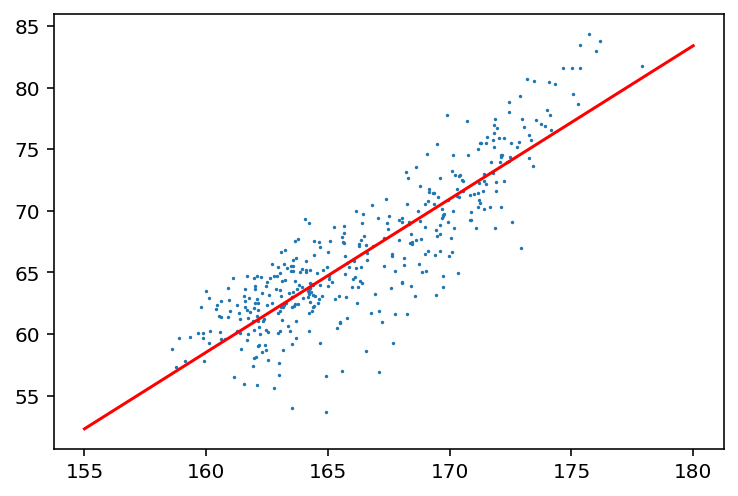

In [11]:
xs = np.linspace(155,180,2)
ys = xs * leg1.coef_[0] + leg1.intercept_
plt.scatter(x,y, s=0.5)
plt.plot(xs, ys, c='r')

In [12]:
# 남성을 0으로 여성을 1로 인코딩
X1 = pd.DataFrame({'height':x1, 'sex':1})
X2 = pd.DataFrame({'height':x2, 'sex':0})
X = pd.concat([X1, X2], ignore_index=True)
X

,height,sex
0,168.589638,1
1,165.290560,1
2,169.582352,1
3,169.664347,1
4,171.427275,1
...,...,...
395,164.423486,0
396,164.259586,0
397,165.234994,0
398,162.773172,0


In [13]:
# sex = [0]*n_samples + [1]*n_samples

In [14]:
# X = pd.DataFrame(x)
# X['sex'] = sex
# X

In [15]:
np.random.seed(19)
X_train, X_test, y_train, y_test = train_test_split(X, y)
leg = LinearRegression()
leg.fit(X_train, y_train)

leg.score(X_test, y_test)

0.8421573499192645

## 성별을 고려하여 성능이 개선됨

In [16]:
print(leg.coef_)
print(leg.intercept_)

[ 1.62602395 -3.94114607]
-202.07272880021748


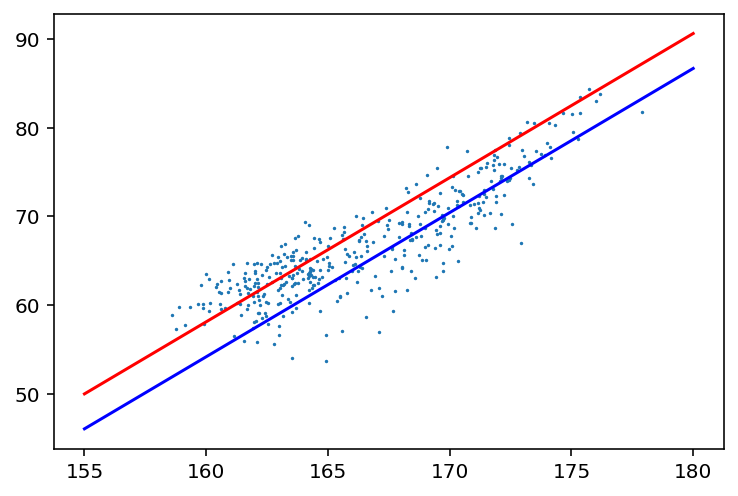

In [17]:
xs = np.linspace(155,180,3)
plt.scatter(x,y, s=0.5)
ys = xs * leg.coef_[0] + leg.coef_[1]*1 + leg.intercept_
plt.plot(xs, ys, c='b')
ys = xs * leg.coef_[0] + leg.coef_[1]*0 + leg.intercept_
plt.plot(xs, ys, c='r')

# 선형 분류

In [18]:
X["weight"] = y
X[:10]

,height,sex,weight
0,168.589638,1,63.066038
1,165.290560,1,62.835376
2,169.582352,1,68.122888
3,169.664347,1,70.115951
4,171.427275,1,70.162367
5,174.671996,1,81.598231
6,172.892089,1,79.357110
7,165.049438,1,64.439996
8,165.363249,1,60.471194
9,169.913997,1,69.072302


In [19]:

y = X["sex"] ;y[:5]

0    1
1    1
2    1
3    1
4    1
Name: sex, dtype: int64

In [20]:
X = X.drop(["sex"], axis=1, errors='ignore');X[:5]

,height,weight
0,168.589638,63.066038
1,165.290560,62.835376
2,169.582352,68.122888
3,169.664347,70.115951
4,171.427275,70.162367


In [21]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_sc = sc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_sc, y)
clf = SGDClassifier() # (1) 모델 정의
clf.fit(X_train, y_train) #(2) 학습
clf.score(X_test, y_test) # accuracy

0.97

In [22]:
y_pred = clf.predict(X_test) # (3) 모델 사용

In [23]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

- Precision  = 모델이 옳다고 한 것이 실제로 옳은 비율     TP / ( TP + FP ) 
- Recall =  실제 정답인 것들 중, 모델이 정답이라고 예측한 것    TP / TP+FN
- f1-score = Precision과 Recall의 조화평균  (2 x  Precision x Recall ) /  (Precision + Recall)
- support는 이 모델에서 응답한 샘플의 수이다

In [24]:
confusion_matrix(y_test, y_pred)

array([[46,  3],
       [ 0, 51]])

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        49
           1       0.94      1.00      0.97        51

    accuracy                           0.97       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100



In [26]:
clf.coef_, clf.intercept_

(array([[10.13135878, -3.36085874]]), array([0.92752417]))

In [27]:
a1, a2, b = clf.coef_[0][0], clf.coef_[0][1], clf.intercept_

In [28]:
m1, m2 = sc.mean_[0], sc.mean_[1]
s1, s2 = sc.scale_[0], sc.scale_[1]

In [29]:
m1,m2, s1, s2

(166.51083740919833, 66.67402367518277, 4.129720631507277, 5.9465584131929745)

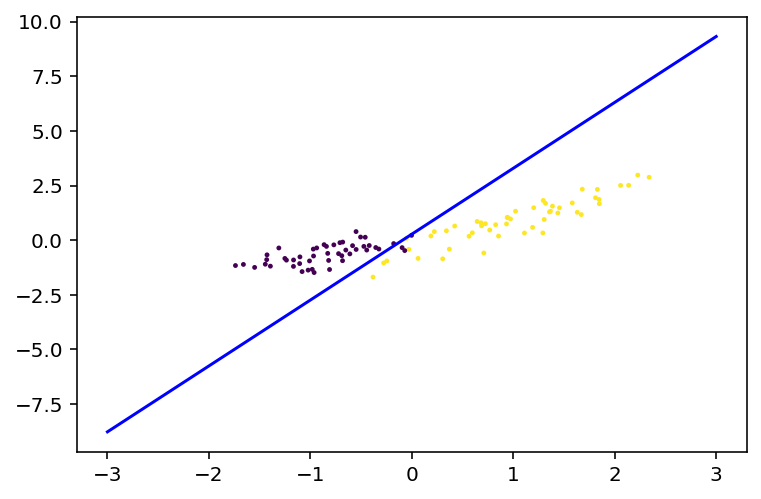

In [30]:
xs = np.linspace(-3,3,2)
plt.scatter(X_test[:,0],X_test[:,1], s=2, c=y_test)
ys = xs * (-a1/a2) - b/a2
plt.plot(xs, ys, c='b')

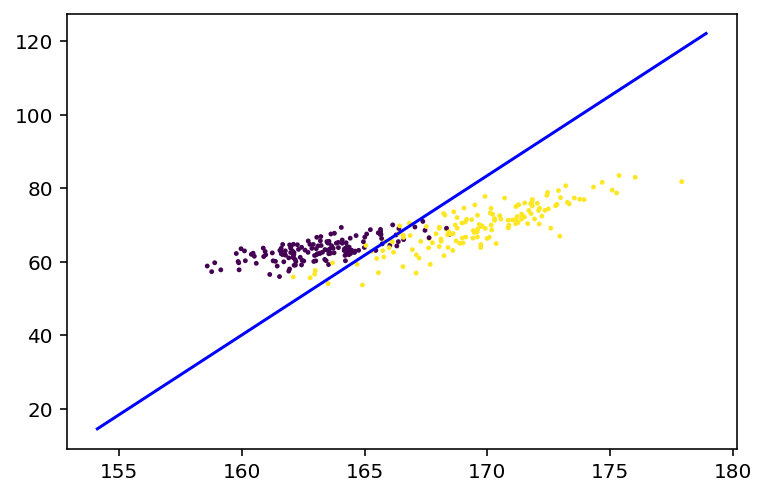

In [32]:
xs = np.linspace(-3,3,3)
plt.scatter(X_train[:,0]*s1+m1,X_train[:,1]*s2+m2, s=2, c=y_train)
ys = xs * (-a1/a2) - b/a2
plt.plot(xs*s1+m1, ys*s2+m2, c='b')

In [33]:
scores = clf.decision_function(X_test)

In [34]:
scores

array([ -2.50513028,  10.96585577,  14.04880372,  -3.85394241,
        10.08224067,  -5.68418892,   8.60344456,   2.04128732,
         3.03172391,   1.6276483 ,   6.87806679,  -9.20198553,
        -4.3213698 ,  -2.83954163,  -6.0993979 ,  -2.77951606,
        -5.44428862,  14.14098632,   7.88111505,   6.82440728,
        13.15919039,   8.95149709,  -7.54055043,  11.64819446,
        12.74376632,  -6.86373678,  11.32477095, -12.16343087,
        -4.26839247,  12.9047448 ,   7.51777225,  -4.67882608,
        -3.6781879 , -10.01311009,  -3.15553283,  13.35059355,
         5.68407353,  -4.17755587,  -7.14571238, -10.57253716,
         5.17215774,  10.3326311 ,  11.21645189,   8.10476599,
        -2.90893571,  -5.87023125,  -7.8422652 ,  -5.20300831,
       -10.58792166,   4.34873483,   1.1010874 ,   1.81613892,
         5.8362191 ,  -7.38274314,  11.01738861,   9.73007364,
        -8.94700028, -11.15548657,   4.56815472,  10.32433462,
        13.47985483,  13.91499377,  -8.52738637,   5.73

In [35]:
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, _ = roc_curve(y_test, scores)
roc_auc = auc(fpr, tpr)

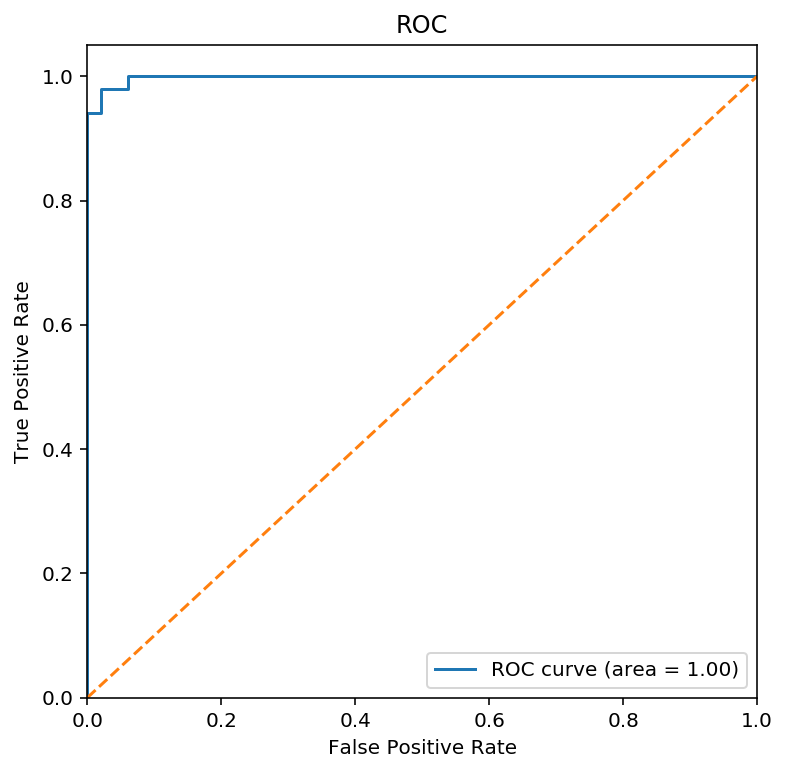

In [36]:
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")

## (참고) 랜덤 포레스트를 사용하는 경우

In [0]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=20) # (1)
clf.fit(X_train, y_train) #(2)
clf.score(X_test, y_test)

0.95

## (참고) ROC 성능 비교

In [169]:
# 평가 점수 score 임의로 20명을 배정, 랭킹 평가
y_score = np.linspace(99, 60, 20).round(1)
print(y_score)

[99.  96.9 94.9 92.8 90.8 88.7 86.7 84.6 82.6 80.5 78.5 76.4 74.4 72.3
 70.3 68.2 66.2 64.1 62.1 60. ]


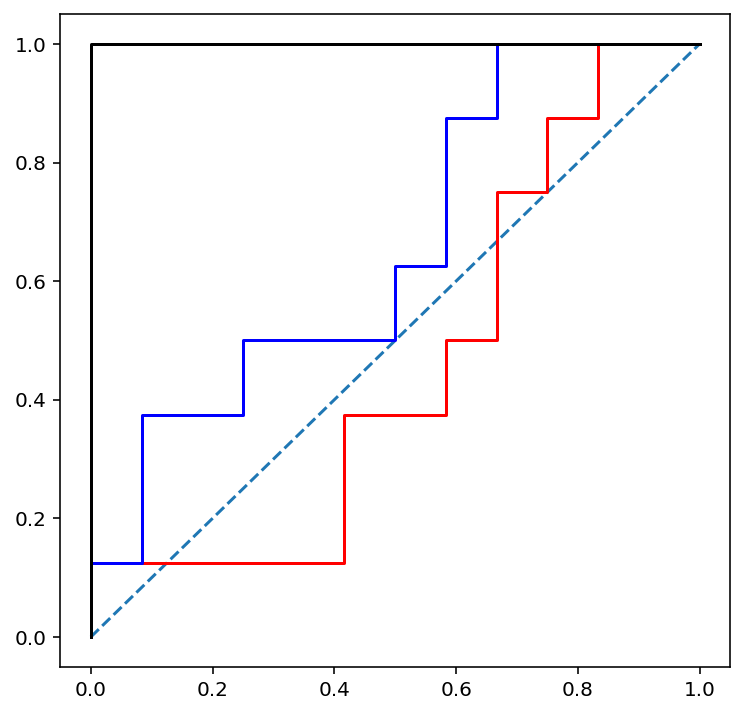

In [172]:
y_real=[[1,0,0,0,0,0,1,1,0,0,1,0,1,1,0,1,0,1,0,0],
        [1,0,1,1,0,0,1,0,0,0,1,0,1,1,0,1,0,0,0,0],
        [1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0]]

plt.figure(figsize=(6,6))    
fpr = dict()
tpr = dict()
plt.plot([0, 1], [0, 1], linestyle='--')

my_color = ['r', 'b', 'k']
for i in range(3):
    fpr, tpr, _ = roc_curve(y_real[i], y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, c=my_color[i])